In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import numpy as np

Our data was collected with a web scraping software through the IMBD website. We used only the top 200 grossing films released in that year. The years ranged from (2012-2022). In addition to the IMDB database we also used a SQL database which held metadata of about 14,000 films. The structure of the SQL database is showed in the following ERD.

In [2]:
# import image module
from IPython.display import Image

# get the image
Image(url="https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg", width=300, height=300)

In order to properly get all of our data into one pandas data frame, we needed to iterate through the different sheets in the excel file and concatanate all 11 sheets into one pandas dataframe.

In [3]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"] = pd.read_excel("IMDB_boxoffice_2022_2012.xlsx", sheet_name = str(year), na_values = "-" )

In [4]:
for year in range(2012, 2023):
    globals()[f"box_office_{year}"]["release_year"] = year

In [5]:
box_office_decade = pd.concat([box_office_2012,
           box_office_2013,
           box_office_2014,
           box_office_2015,
           box_office_2016,
           box_office_2017,
           box_office_2018,
           box_office_2019,
           box_office_2020,
           box_office_2021,
           box_office_2022], ignore_index=True)

After adding all 11 dataframes together we see that there are 200 movies for each year. This is exactly what we should expect. Since our IMDB database had records for the top 200 grossing movies for each year from 2012-2022.

In [6]:
box_office_decade.groupby("release_year").count()

,Rank,Release,Genre,Budget,Running Time,Gross,Max Th,Opening,% of Total,Open Th,Open,Close,Distributor,Estimated
release_year,,,,,,,,,,,,,,
2012,200,200,0,0,0,200,198,195,193,195,200,199,199,200
2013,200,200,0,0,0,200,200,199,198,199,200,198,197,200
2014,200,200,0,0,0,200,200,200,200,200,200,199,198,200
2015,200,200,0,0,0,200,200,198,194,198,200,199,198,200
2016,200,200,0,0,0,200,200,199,198,199,200,196,198,200
2017,200,200,0,0,0,200,200,196,196,196,200,198,198,200
2018,200,200,0,0,0,200,200,198,197,198,200,198,192,200
2019,200,200,0,0,0,200,199,197,196,197,200,136,196,200
2020,200,200,0,0,0,200,195,184,153,180,200,6,198,200


Knowing the structure of our SQL database we changed the column assosicated with the name of each movie to "primary_title" this was a step that made joining our scraped data with our SQL data more straightforward. 

In [7]:
box_office_decade.rename(columns = {"Release": "primary_title"}, inplace= True)
box_office_decade.drop(columns = "Estimated", inplace = True)

In [8]:
con = sqlite3.connect('..\im.db')

cursor = con.cursor()


# Execute the query
# (This is a special query for finding the table names. You don't need to memorize it.)
cursor.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
# Fetch the result and store it in table_names

table_names = cursor.fetchall()

table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
movie_basics = pd.read_sql("""

SELECT  *
FROM movie_basics


""", con)

After saving the table called "movie_basics" as a dataframe called 'movie_basics' we are now ready to perfrom an inner join on our original box office data and our SQL box office data.

In [10]:
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
movies = pd.merge(box_office_decade, movie_basics, how = "inner", on = "primary_title")

In [12]:
movies.drop(columns= ["start_year", "original_title", "Genre", "Budget", "Running Time"], inplace= True)

In [13]:
#Expanding Genres into 3 seperate columns
movies["genre1"] = movies["genres"].str.split(',', expand = True)[0]
movies["genre2"] = movies["genres"].str.split(',', expand = True)[1]
movies["genre3"] = movies["genres"].str.split(',', expand = True)[2]
movies.drop(columns= ["genres", "% of Total"], inplace= True)

After an inner join, some redundant columns were created and these columns were dropped. More importantly though we noticed that the "genres" columns was a list of up to 3 genres per movie. Although not ever film had 3 genres in order to perfrom further analysis on movie genres we needed to split this information into seperate columns.

In [14]:
# dropping columns that will not be needed 
movies_clean = movies.drop(columns = ["Max Th", "Opening"])

In [15]:
# grouping by release year in order to investigate the relationship between the release year of a movie and its gross profit
movies_per_year = movies.groupby("release_year")["release_year"].count()
years = movies["release_year"].value_counts().keys().sort_values()
values = movies["release_year"].value_counts()

# Now that our data is clean and all stored in one datframe it is time to start visualizing our results.

Groupby functions will be used often to help represent the relationship between two metrics in our data frame. 

In [16]:
avg_per_genre = movies_clean.groupby("genre1")["Gross"].mean().sort_values(ascending= False)

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/150375216.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_per_genre.keys(), rotation=40)


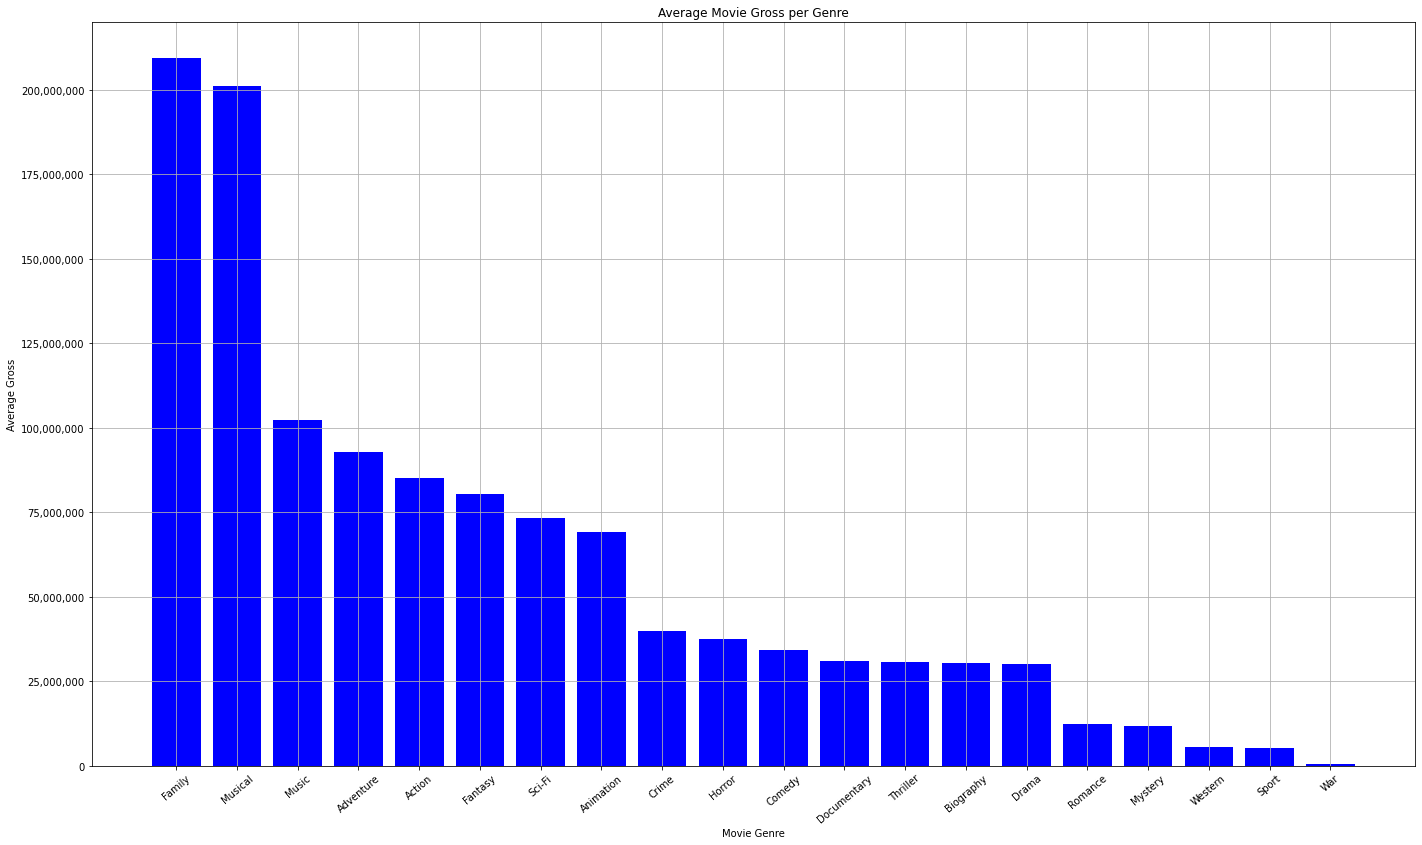

In [17]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_per_genre.keys(), avg_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(avg_per_genre.keys(), rotation=40)
ax.set_ylabel("Average Gross")
ax.set_title('Average Movie Gross per Genre')
plt.grid()
# This line of code is used to conver the y axis values from scientific notation to numbers seperated by columns.
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

Here i am dealing with some messy datatime data. We had the release date of a given movie stored in the release date column but only the month is needed for this grouping.

In [18]:
movies_clean["release_month"] = movies_clean["Open"].apply(lambda x: x.strftime("%b"))

In [19]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

movies_clean['month'] = pd.Categorical(movies_clean['release_month'], categories=months, ordered=True)

movies_clean.sort_values(by="month",inplace=True)  # 

months = movies_clean.groupby("month")["Gross"].mean().keys()
avg_gross_per_month = movies_clean.groupby("month")["Gross"].mean()

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/3515037356.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months, rotation=40)


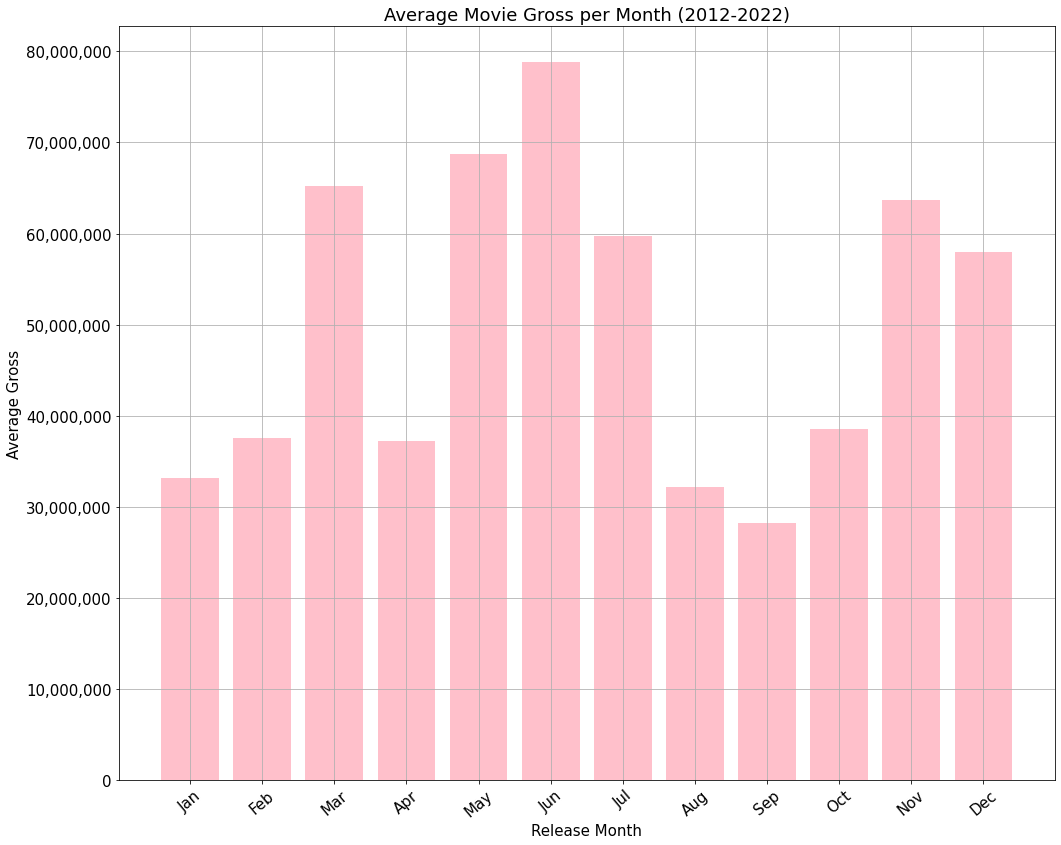

In [20]:
fig, ax = plt.subplots(figsize=(15,12))

# sets up bar plot
ax.bar(months, avg_gross_per_month, color = "pink")
ax.set_xlabel('Release Month')
ax.set_xticklabels(months, rotation=40)
ax.set_ylabel('Average Gross')
ax.set_title('Average Movie Gross per Month (2012-2022)')
plt.grid()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

In [21]:
total_gross_per_year = movies_clean.groupby("release_year")["Gross"].sum()
years = total_gross_per_year.keys()

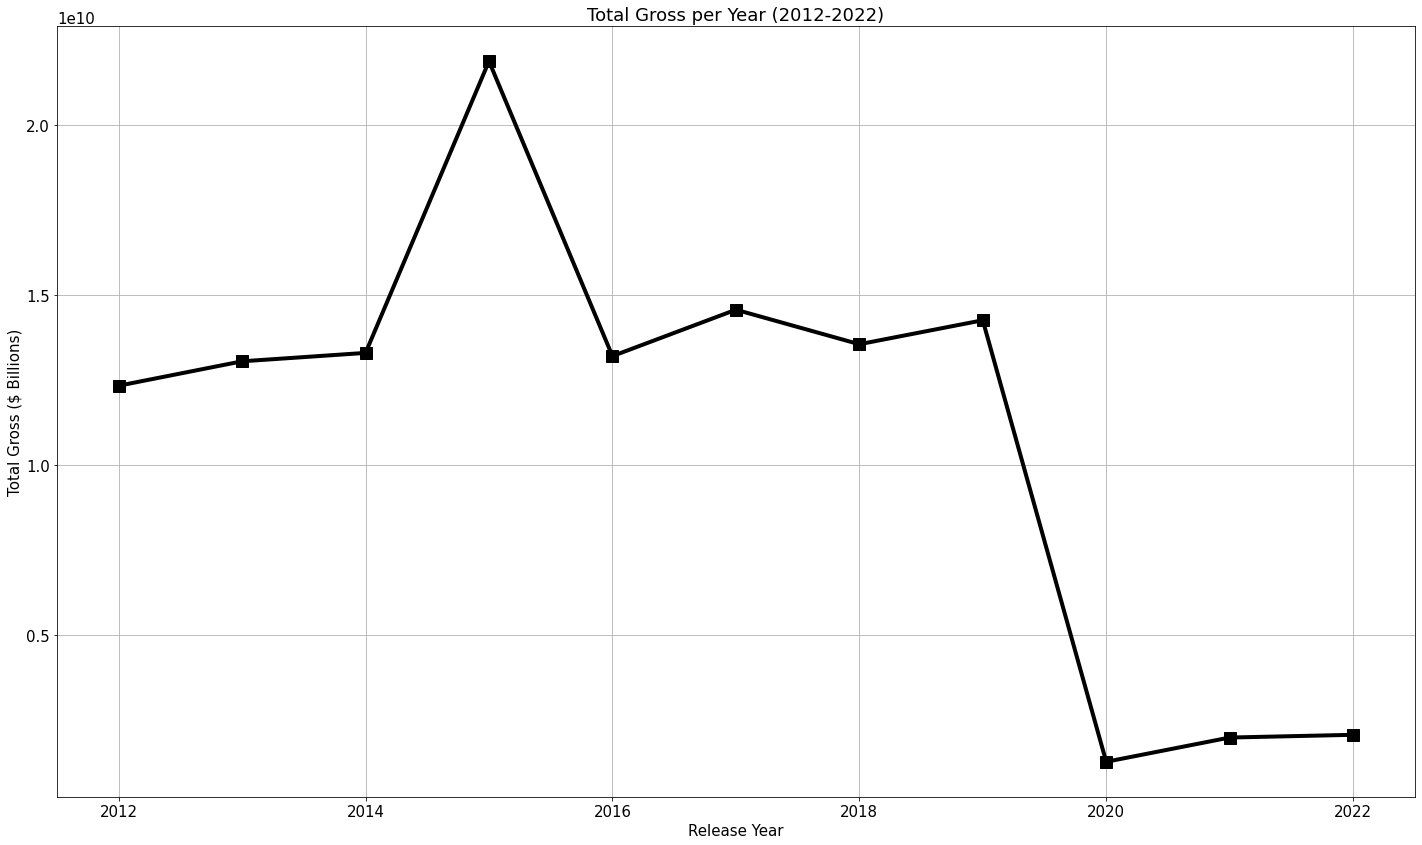

In [22]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.plot(years, total_gross_per_year, color = "k",  marker = 's', markersize=12,  linewidth = 4)
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Gross ($ Billions)')
ax.set_title('Total Gross per Year (2012-2022)')
plt.grid()
plt.tight_layout()
plt.show();

This line graph was calculated to see the general trend of the box office over the last 4 years. Of course more eyars could have been used but we limited it to only 4 years in order to have a not so cluttered graph. 

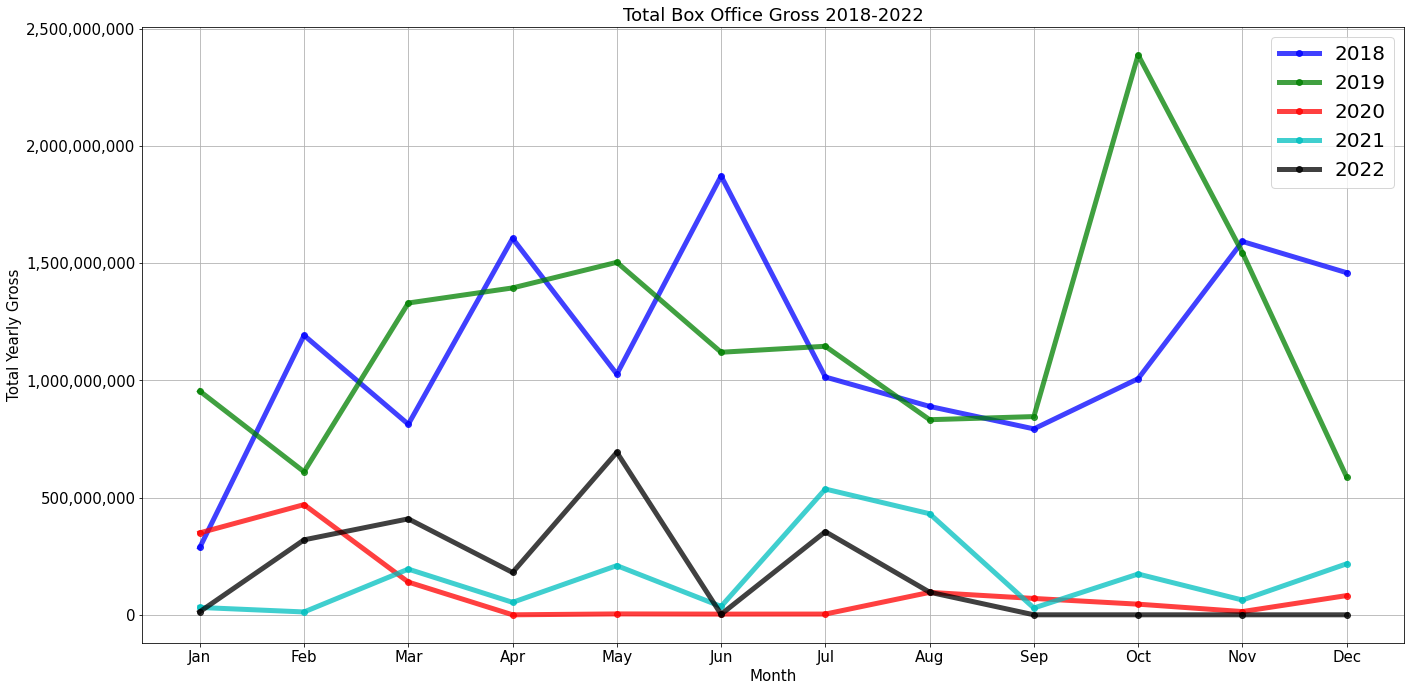

In [23]:
fig, ax = plt.subplots(figsize=(20,10))

gross_per_month_year = movies_clean.groupby(["release_year", "month"])["Gross"].sum() # grouping by release year and month columns
colors = ["b", "g", "r", "c", "k"] #instantiate a list to iterate through
years = [2018, 2019, 2020, 2021, 2022] # instantiate years list 

for year,color in zip(years, colors): #zip both list toegther to iterate through them
    ax.plot(months, gross_per_month_year[year], c = color,  marker = 'o', alpha = .75, label= f'{year}', linewidth = 5)

ax.set_xlabel('Month')
plt.grid()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))) 
ax.set_ylabel('Total Yearly Gross')
ax.set_title(f'Total Box Office Gross 2018-2022')
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
leg = ax.legend();
plt.show();

Our dataset only had one data point for war movies, and this one data point was missing the runtime data. In order to preserve this row and not drop war movies from our dataset altogether we manually updated the runtime.

In [24]:
movies_clean.runtime_minutes.dropna(inplace = True)
movies_clean.loc[movies_clean.genre1 == "War"]
movies_clean["runtime_minutes"][2197] = 149

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/349778042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_clean["runtime_minutes"][2197] = 149


In [25]:
avg_runtime_per_genre = movies_clean.groupby("genre1")["runtime_minutes"].mean().sort_values(ascending= False)

avg_runtime_per_genre

genre_for_runtime = avg_runtime_per_genre.keys()

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/3507013765.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(genre_for_runtime, rotation=90)


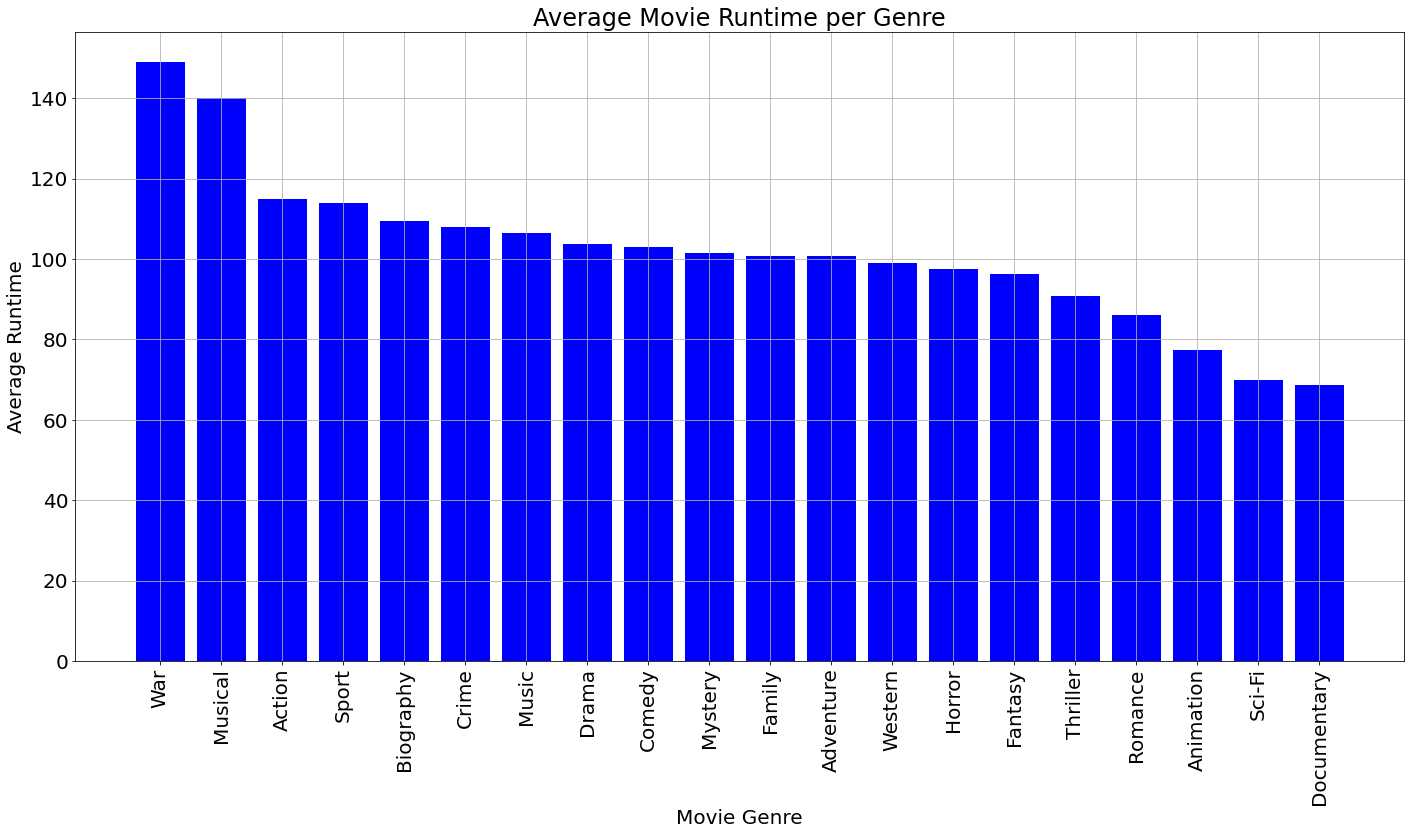

In [26]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(genre_for_runtime, avg_runtime_per_genre, color = "blue")
ax.set_xlabel('Movie Genre')
ax.set_xticklabels(genre_for_runtime, rotation=90)
ax.set_ylabel("Average Runtime")
ax.set_title('Average Movie Runtime per Genre')
plt.grid()
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show();

This dataset/excel file was provided for us and was downnloaded via the class github repo. It is an excel sheet with budget and domestic/worldwide gross for several thousand movies.

In [27]:
budgets = pd.read_excel("tn_movie_budgets.xlsx")

budgets

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


Merging the movies_clean excel sheet on the budgets data to eventually create a column that will have the movies profit margins.

In [28]:
movies_clean = pd.merge(movies_clean, budgets, how = "left", on = "primary_title")

In [29]:
directors = pd.read_sql("""

SELECT  *
FROM directors


""", con)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [30]:
persons = pd.read_sql("""

SELECT  person_id, primary_name
FROM persons


""", con)

persons

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [31]:
movie_directors = pd.merge(directors, persons, how = "inner", on = "person_id")

In [32]:
movies = pd.merge(movies_clean, movie_directors, how = "left", on = "movie_id").drop_duplicates(subset="primary_title")

movies.rename(columns = {"primary_name": "director"}, inplace= True) #renaming columns in order to have a column to merge on 


movies['director'].fillna("Praveen Gowtham", inplace=True) #filling in na values in the directors column with a place holder Praveen

movies["profit"] = movies.worldwide_gross - movies.production_budget # calculating profit in pandas by subtracting wordwide gross with budget

movies["profit_margin"] = ((movies.worldwide_gross - movies.production_budget)/movies.worldwide_gross) # creating a profit margin column

movies["profitable"] = movies["profit"] > 0 # creating a profitable bianry column True = proftiable False = unprofitable

Creating a list of the top 5 most profitable directors

In [33]:
top_15_dir_by_profit = movies[["director", "profit"]].sort_values(by = "profit", ascending = False)[:15]

top_15_dir_by_profit[:5]

,director,profit
2495,Anthony Russo,1.748134e+09
3277,Colin Trevorrow,1.433855e+09
2250,James Wan,1.328723e+09
3014,Joss Whedon,1.292936e+09
1120,Ryan Coogler,1.148258e+09


C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/4113473992.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_15_dir_by_profit["director"], rotation=75)


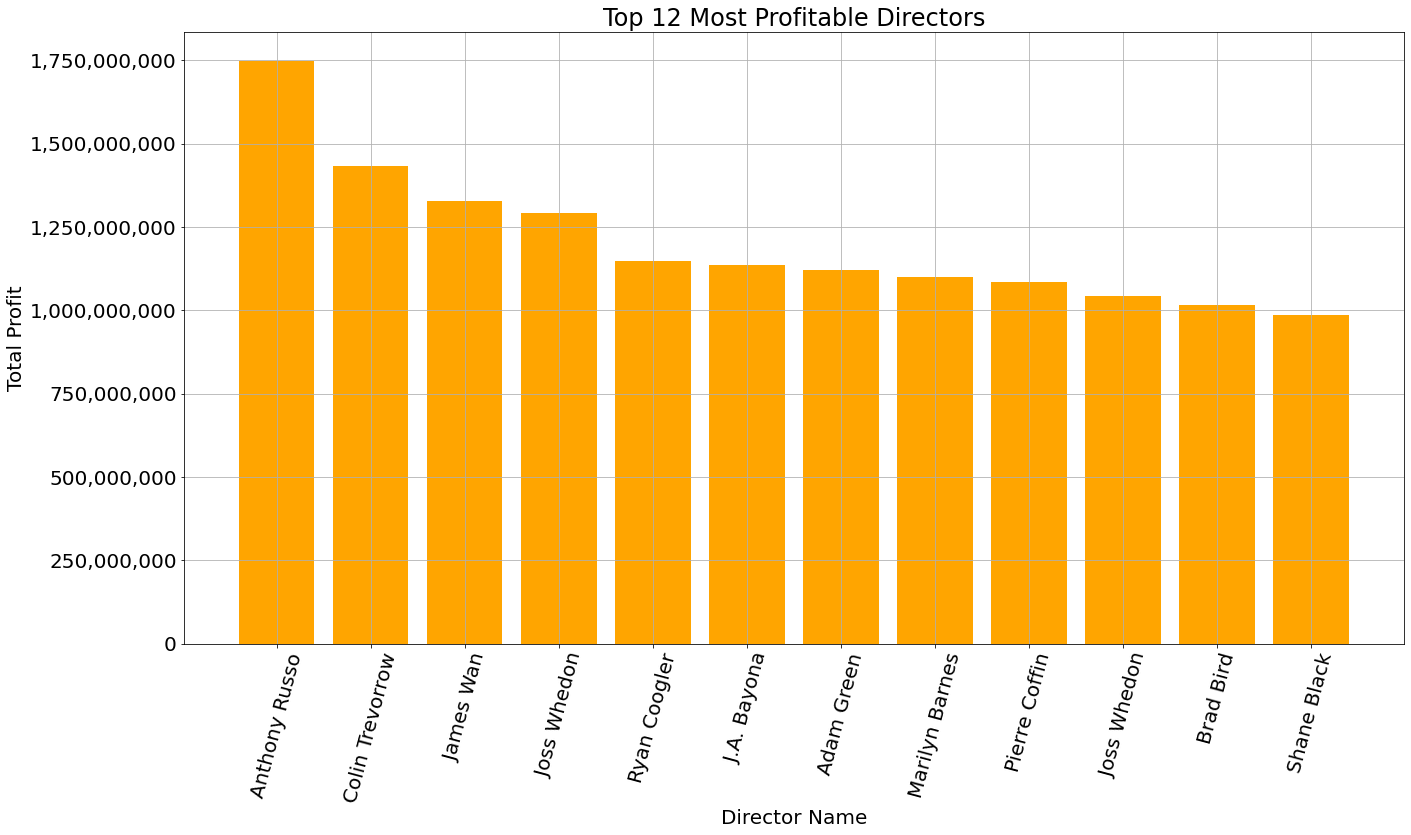

In [34]:
fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(top_15_dir_by_profit["director"], top_15_dir_by_profit["profit"], color = "orange")
ax.set_xlabel('Director Name')
ax.set_xticklabels(top_15_dir_by_profit["director"], rotation=75)
ax.set_ylabel("Total Profit")
plt.grid()
ax.set_title('Top 12 Most Profitable Directors')
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.show();

Creating a new data frame with only the top 15 most profitable direcotors.

In [35]:
df_list = []
for director in top_15_dir_by_profit["director"]:
    df_list.append(movies.loc[movies.director == director])
top_prof_movies = pd.concat(df_list)

This pandas series shows the most profitable directors by genre

In [36]:
top_prof_movies.groupby(["director", "genre1"])["profit"].sum()[:5]

director         genre1   
Adam Green       Adventure    1.122470e+09
Anthony Russo    Action       3.182606e+09
Brad Bird        Action       1.042521e+09
Colin Trevorrow  Action       1.433855e+09
                 Comedy       3.672318e+06
Name: profit, dtype: float64

In [37]:
top_20_dir_by_profit_margin = movies[["director", "profit_margin"]].sort_values(by = "profit_margin", ascending = False)[:20]
top_20_dir_by_profit_margin[:5]

,director,profit_margin
3832,Travis Cluff,0.997599
899,William Brent Bell,0.990173
2347,Levan Gabriadze,0.984463
29,Robbie Walsh,0.982077
1032,Jordan Peele,0.980420


In [38]:
movies.loc[movies.genre1 == "Musical"] #dropping movies in the musical genre in order to accurately show averages

movies.drop(index = [4201, 1659 ], inplace = True)

In [39]:
movies.loc[movies.genre1 == "Thriller"]
movies.drop(movies[movies['genre1'] == "Thriller"].index, inplace = True)

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/2956226069.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_prof_per_genre.keys(), rotation=90)


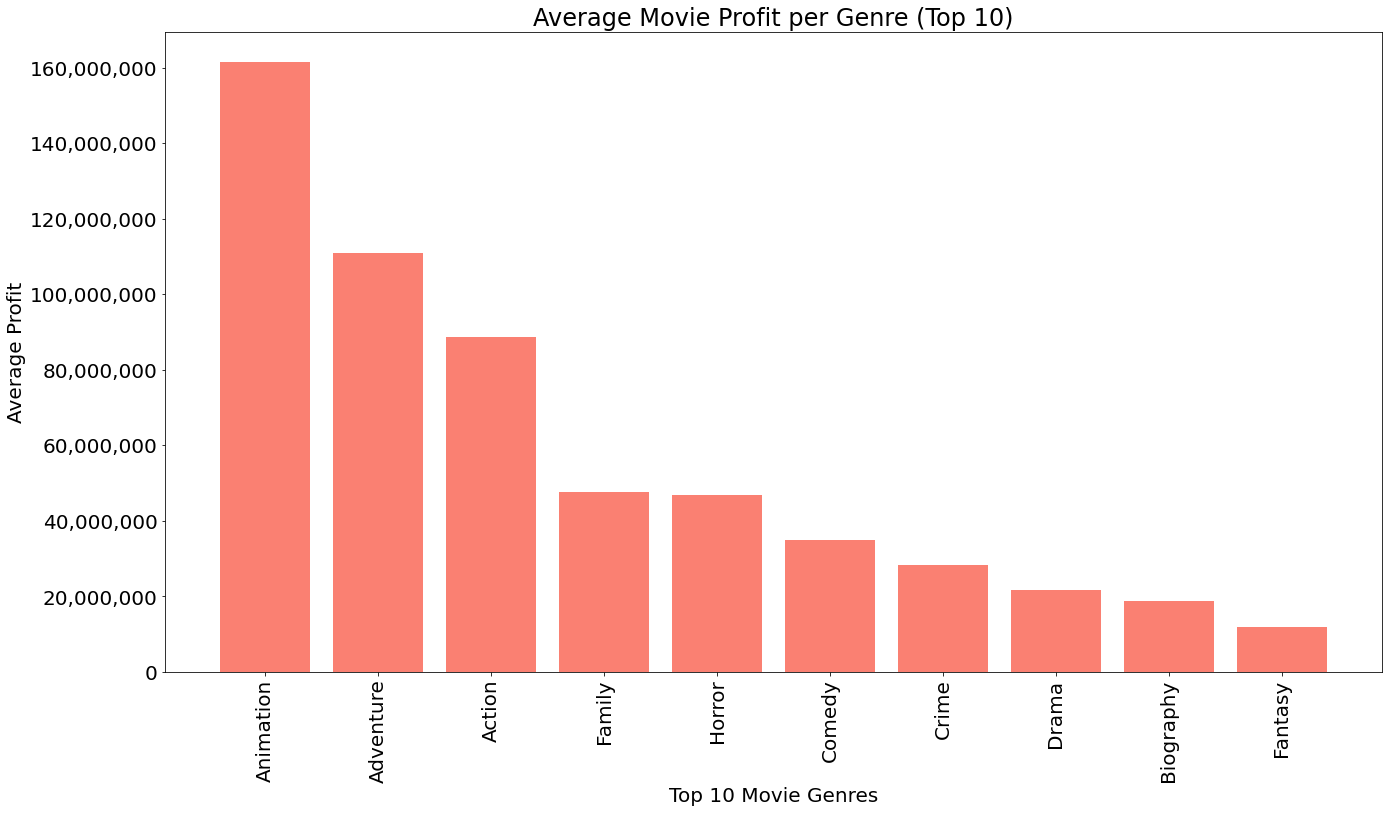

In [40]:
avg_prof_per_genre = movies.groupby("genre1")["profit"].median().sort_values(ascending= False)

import matplotlib as mpl

fig, ax = plt.subplots(figsize=(20,12))

# sets up bar plot
ax.bar(avg_prof_per_genre.keys()[:10], avg_prof_per_genre[:10], color = "salmon")
ax.set_xlabel("Top 10 Movie Genres")
ax.set_ylabel("Average Profit")
ax.set_title('Average Movie Profit per Genre (Top 10)')
plt.grid()
ax.set_xticklabels(avg_prof_per_genre.keys(), rotation=90)
# ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.rcParams.update({'font.size': 30})
plt.grid()
plt.tight_layout()
plt.show();

In [41]:
movies.drop(columns = ["domestic_gross"], inplace = True) # dropping unused columns and renaming them for ease of use
movies.rename(columns={"Gross": "domestic_gross"}, inplace= True)

In [42]:
movies.runtime_minutes.fillna(movies.runtime_minutes.mean(), inplace= True) #filling the missing values in the runtime column with means

In [43]:
domestic_gross_per_dist = movies.groupby("Distributor")["domestic_gross"].mean().sort_values(ascending = False)[:10] # grouping by distributor and seeing 
# domestic gross trends

top_10_dist = ['Disney Studios', 'DreamWorks',
 'Universal Pictures', 'Sony Pictures',
 'Warner Bros.', 'Twentieth Century', 'Columbia Pictures',
 'Paramount Pictures', 'Lionsgate', 'TriStar Pictures']

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/3968476811.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_dist, rotation=70)


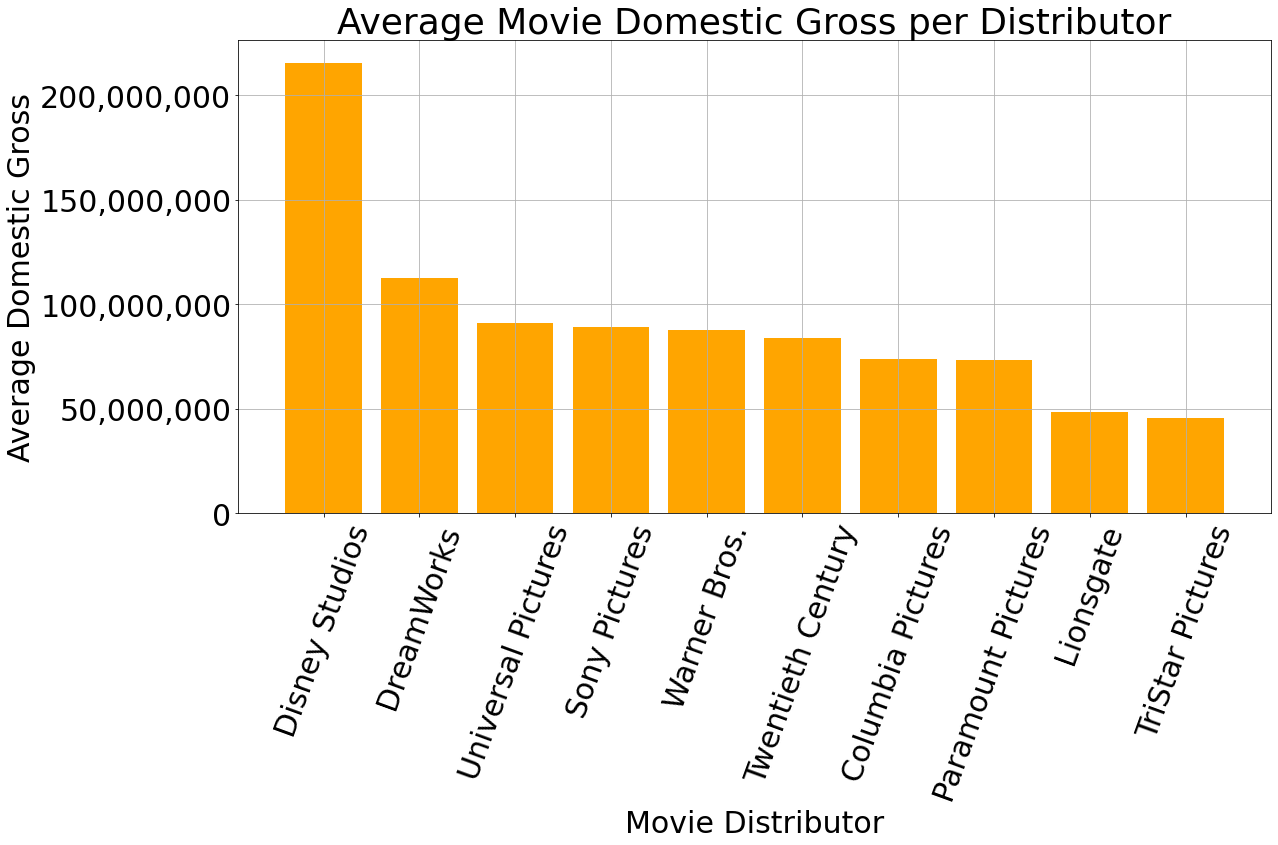

In [44]:
fig, ax = plt.subplots(figsize=(18,12))

# sets up bar plot
ax.bar(top_10_dist, domestic_gross_per_dist, color = "orange")
ax.set_xlabel('Movie Distributor')
ax.set_ylabel("Average Domestic Gross")
ax.set_title('Average Movie Domestic Gross per Distributor')

ax.set_xticklabels(top_10_dist, rotation=70)

ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid()
plt.rcParams.update({'font.size': 15})
plt.tight_layout()
plt.show();

Creating tier data for our movies dataframe 

In [45]:
movies["low_tier"] = np.where(movies['production_budget'] <= 5000000, True, False)
movies["mid_tier"] = np.where(((movies['production_budget'] > 50000000) | (movies['production_budget'] < 5000000)), True, False)
movies["high_tier"] = np.where(movies['production_budget'] >= 50000000, True, False)

Cleaning the Opening theaters columns and converting strings to integers

In [46]:
movies["Open Th"] = movies["Open Th"].str.replace(r'[^\w\s]+', '')
movies["Open Th"] = movies['Open Th'].fillna("0")
movies["Open Th"] = movies['Open Th'].astype(int)
movies["Open Th"] = movies["Open Th"].replace("0", movies["Open Th"].mean())

C:\Users\pedro\AppData\Local\Temp/ipykernel_4780/629262736.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  movies["Open Th"] = movies["Open Th"].str.replace(r'[^\w\s]+', '')


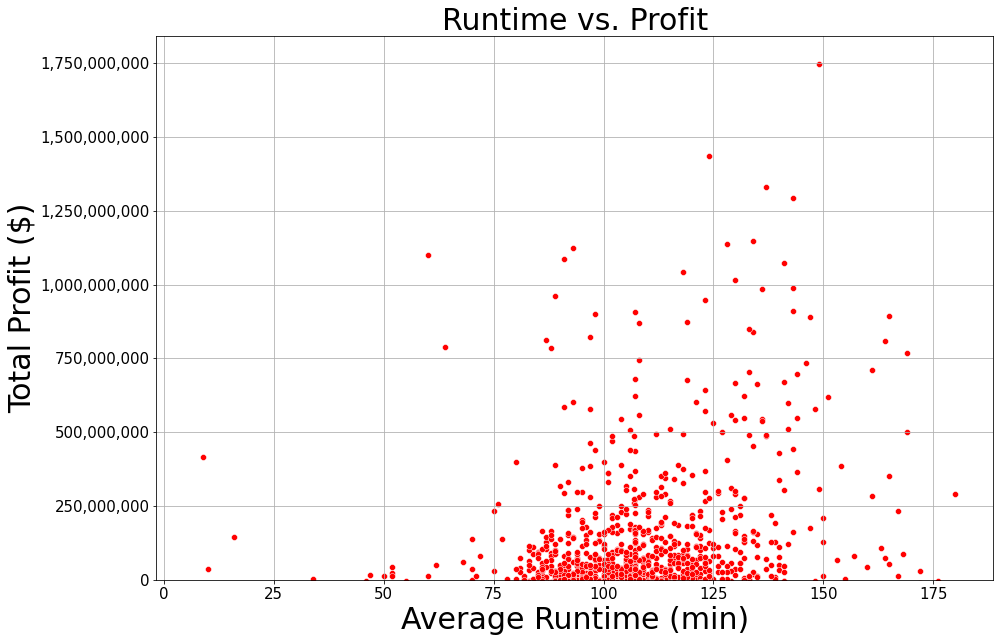

In [47]:
fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(x = "runtime_minutes", y = 'profit', data = movies, ax = ax, color = "red")
ax.ticklabel_format(style='plain', axis='y')
plt.grid()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylim(0, )
ax.set_xlabel("Average Runtime (min)", fontsize = 30)
ax.set_ylabel("Total Profit ($)", fontsize =30)
ax.set_title('Runtime vs. Profit', fontsize = 30)
plt.show()

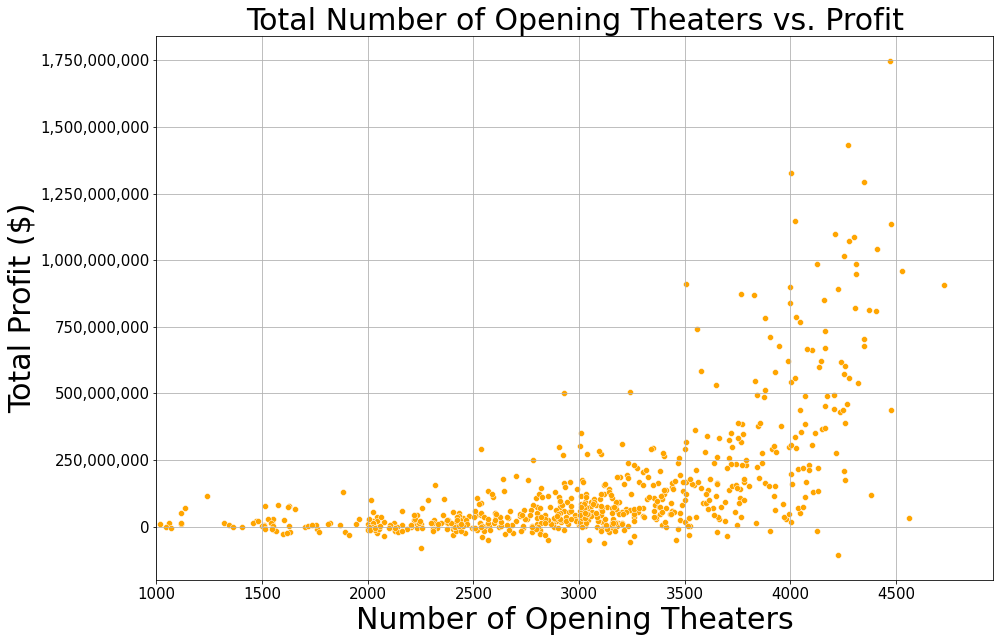

In [48]:
fig, ax = plt.subplots(figsize = (15,10))
sns.scatterplot(x = "Open Th", y = 'profit', data = movies, ax = ax, color = "orange")
ax.ticklabel_format(style='plain', axis='y')
plt.grid()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlim(1000, None)
ax.set_xlabel("Number of Opening Theaters", fontsize = 30)
ax.set_ylabel("Total Profit ($)", fontsize =30)
ax.set_title('Total Number of Opening Theaters vs. Profit', fontsize = 30)
plt.show()

In [49]:
ratings = pd.read_sql("""

SELECT averagerating, movie_id
FROM movie_ratings


""", con)

ratings[:5]

,averagerating,movie_id
0,8.3,tt10356526
1,8.9,tt10384606
2,6.4,tt1042974
3,4.2,tt1043726
4,6.5,tt1060240


In [50]:
movie_ratings = pd.merge(movies, ratings, how = "inner", on = "movie_id")

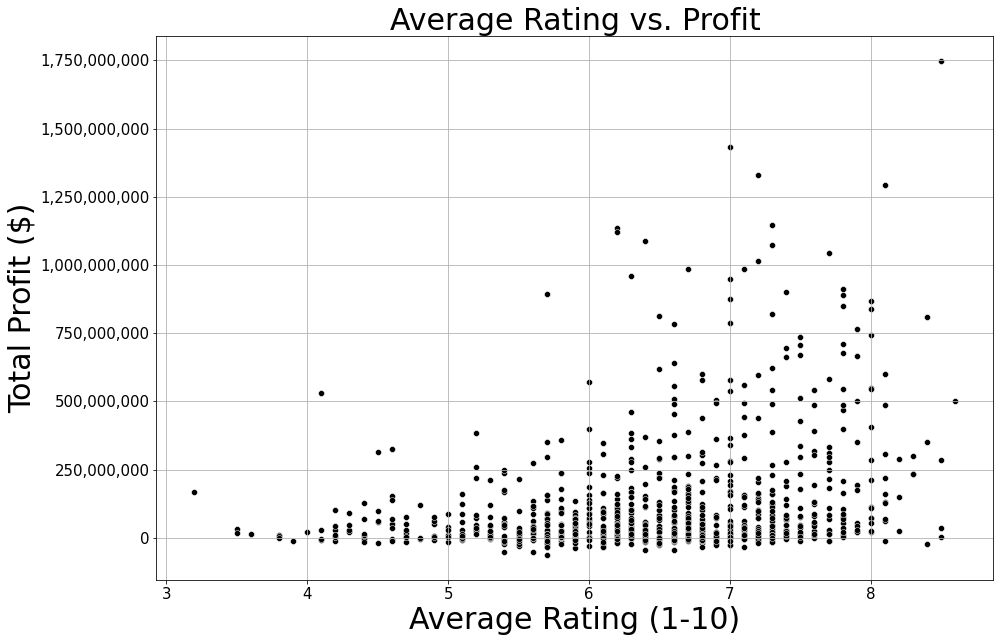

In [51]:
fig, ax = plt.subplots(figsize = (15,10))

sns.scatterplot(x = "averagerating", y = 'profit', data = movie_ratings, ax = ax, color = "black")
ax.ticklabel_format(style='plain', axis='y')
plt.grid()
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_xlabel("Average Rating (1-10)", fontsize = 30)
ax.set_ylabel("Total Profit ($)", fontsize =30)
ax.set_title('Average Rating vs. Profit', fontsize = 30)
plt.show()

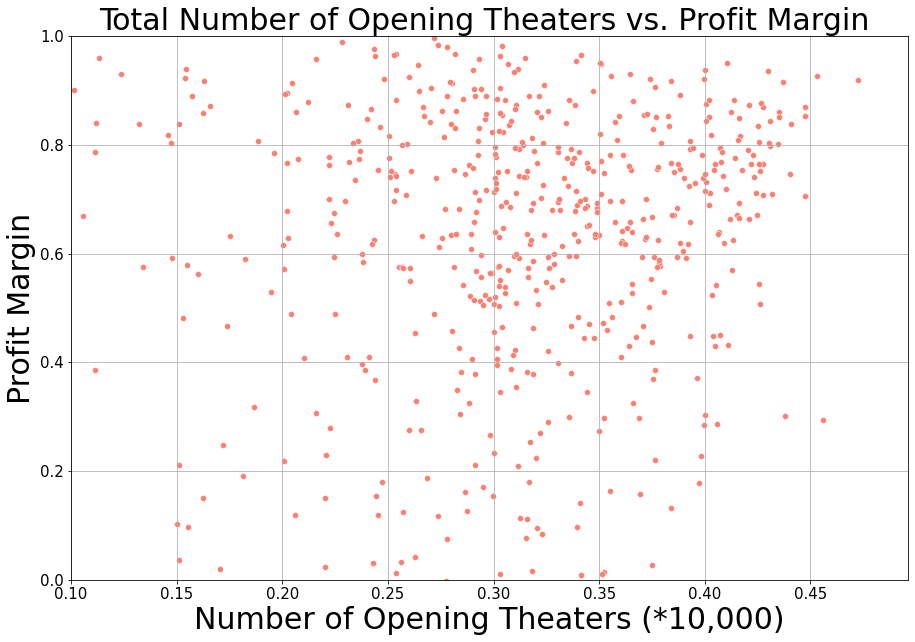

In [52]:
fig, ax = plt.subplots(figsize = (15,10))

movies["opening_theaters"] =  movies["Open Th"]/ 10000

sns.scatterplot(x = "opening_theaters", y = 'profit_margin', data = movies, ax = ax, color = "salmon")
plt.grid()
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 1.0)
plt.xlim(.1, )
ax.set_xlabel("Number of Opening Theaters (*10,000)", fontsize = 30)
ax.set_ylabel("Profit Margin", fontsize =30)
ax.set_title('Total Number of Opening Theaters vs. Profit Margin ', fontsize = 30)
plt.show()